# Sección 12: Diferenciación Implícita y Derivadas de Orden Superior

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, Eq, solve, cos, sin, sqrt, Function

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Diferenciación Implícita

**Concepto clave**: Cuando una ecuación no puede resolverse explícitamente para $y$ en términos de $x$, usamos diferenciación implícita.

### Implementación paso a paso

=== Diferenciación Implícita ===
Ecuación original: x**3 - 9*x*y + y**3 = 0

Paso 1: Derivada implícita:
Derivada: 3*x**2 - 9*y = 0

Paso 2: Resolver para dy/dx:
dy/dx = No se encontró solución para dy/dx


c:\Users\Mardu\Programacion\Estudio\Matemáticas\calculo-1\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Mardu\Programacion\Estudio\Matemáticas\calculo-1\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


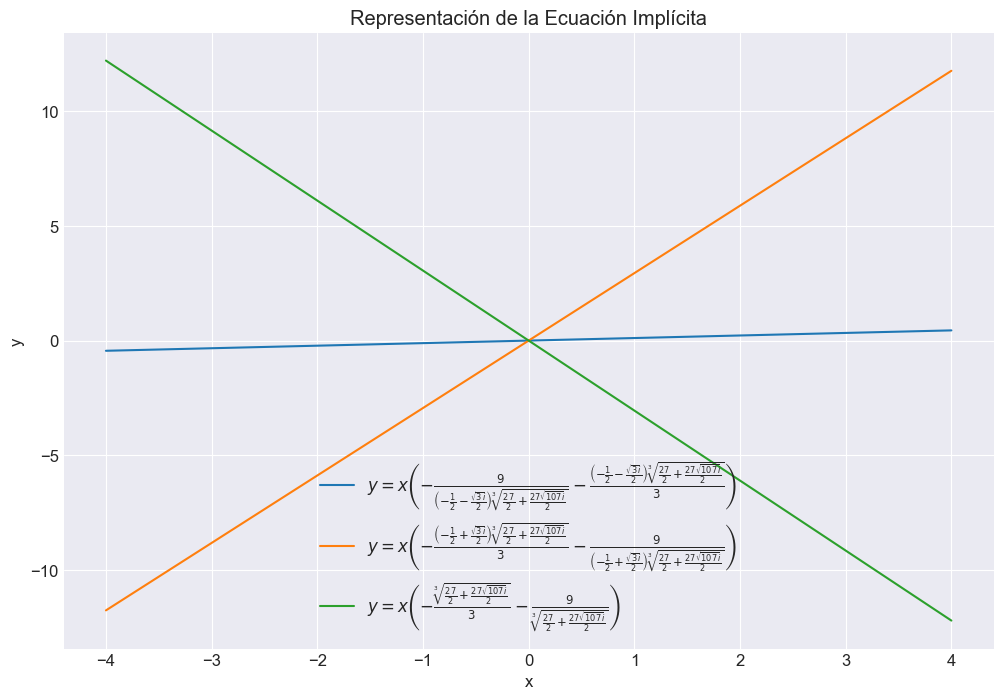

In [3]:
def implicit_differentiation_example():
    x, y = symbols('x y')
    # Definimos la ecuación implícita del ejemplo del PDF
    equation = x**3 + y**3 - 9*x*y
    
    # Paso 1: Diferenciar ambos lados respecto a x
    derivative = diff(equation, x)
    
    # Paso 2: Sustituir dy/dx por y' y resolver para y'
    y_prime = symbols('y_prime')
    derivative_sub = derivative.subs(diff(y, x), y_prime)
    solution = solve(derivative_sub, y_prime)
    
    # Formatear la solución
    if solution:
        simplified_solution = solution[0].simplify()
    else:
        simplified_solution = "No se encontró solución para dy/dx"
    
    print("=== Diferenciación Implícita ===")
    print(f"Ecuación original: {equation} = 0")
    print("\nPaso 1: Derivada implícita:")
    print(f"Derivada: {derivative} = 0")
    print("\nPaso 2: Resolver para dy/dx:")
    print(f"dy/dx = {simplified_solution}")
    
    # Visualización (usamos representación numérica para el gráfico)
    y_solutions = solve(equation, y)
    x_vals = np.linspace(-4, 4, 500)
    
    plt.figure()
    for sol in y_solutions:
        y_lamb = sp.lambdify(x, sol, 'numpy')
        try:
            plt.plot(x_vals, y_lamb(x_vals), label=f'$y = {sp.latex(sol)}$')
        except:
            continue
    
    plt.title('Representación de la Ecuación Implícita')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

implicit_differentiation_example()

## 2. Ecuación de la Línea Tangente con Diferenciación Implícita

**Fórmula**: $y = y_1 + m(x - x_1)$ donde $m = \left.\frac{dy}{dx}\right|_{(x_1,y_1)}$

### Implementación con evaluación en punto específico


=== Línea Tangente con Diferenciación Implícita ===
Ecuación original: -2*x**5 + 3*y**2 - 10 = 0
Punto de tangencia: (1, 2)

Derivada: dy/dx = 5*x**4/(3*y(x))
Pendiente en (1, 2): m = 5/6

Ecuación de la línea tangente:
y = 5*x/6 + 7/6


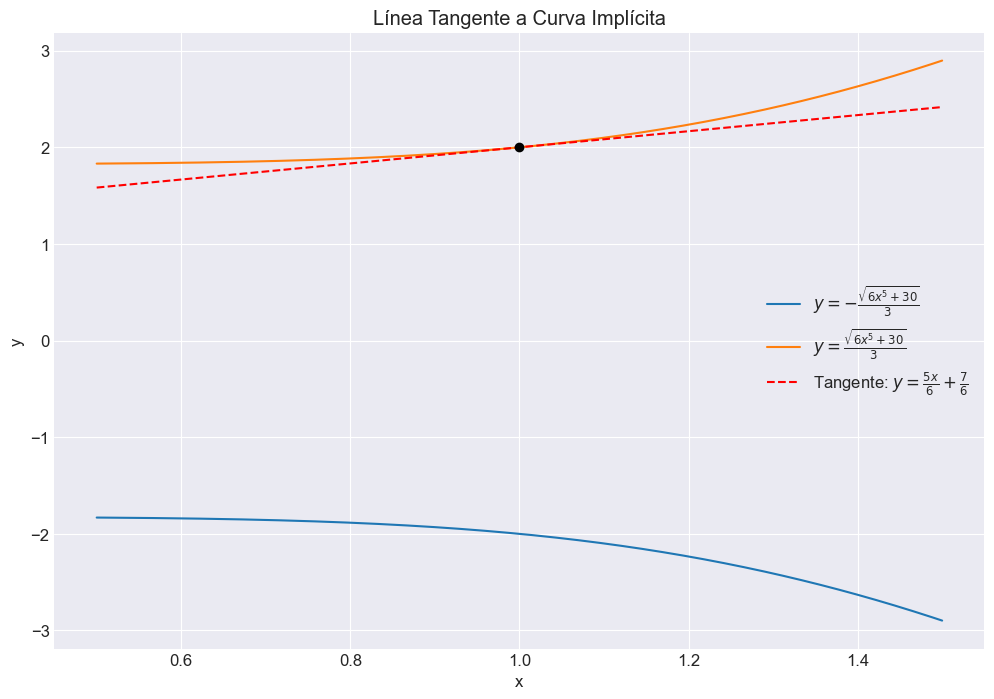

In [7]:
def implicit_tangent_line():
    x, y = symbols('x y')
    equation = 3*y**2 - 2*x**5 - 10
    point = (1, 2)
    
    # Paso 1: Diferenciación implícita correcta
    # Necesitamos indicar que y es función de x
    y_func = sp.Function('y')(x)
    equation_func = equation.subs(y, y_func)
    derivative = sp.diff(equation_func, x)
    
    # Ahora resolver para dy/dx
    dy_dx = sp.solve(derivative, sp.diff(y_func, x))[0]
    
    # Paso 2: Evaluar la derivada en el punto dado
    m = dy_dx.subs({x: point[0], y_func: point[1]})
    
    # Paso 3: Ecuación de la línea tangente
    tangent_line = point[1] + m*(x - point[0])
    
    print("\n=== Línea Tangente con Diferenciación Implícita ===")
    print(f"Ecuación original: {equation} = 0")
    print(f"Punto de tangencia: ({point[0]}, {point[1]})")
    print(f"\nDerivada: dy/dx = {dy_dx.simplify()}")
    print(f"Pendiente en ({point[0]}, {point[1]}): m = {m}")
    print(f"\nEcuación de la línea tangente:")
    print(f"y = {tangent_line.simplify()}")
    
    # Visualización
    y_solutions = solve(equation, y)
    if len(y_solutions) < 1:
        print("No se pudo resolver la ecuación para y.")
        return
    
    plt.figure()
    x_vals = np.linspace(0.5, 1.5, 500)
    
    for sol in y_solutions:
        try:
            y_lamb = sp.lambdify(x, sol, 'numpy')
            plt.plot(x_vals, y_lamb(x_vals), label=f'$y = {sp.latex(sol)}$')
        except:
            continue
    
    tangent_lamb = sp.lambdify(x, tangent_line, 'numpy')
    plt.plot(x_vals, tangent_lamb(x_vals), 'r--', 
             label=f'Tangente: $y = {sp.latex(tangent_line.simplify())}$')
    plt.scatter([point[0]], [point[1]], color='black', zorder=5)
    plt.title('Línea Tangente a Curva Implícita')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

implicit_tangent_line()

## 3. Derivadas de Orden Superior

**Concepto**: La $n$-ésima derivada es la derivada de la $(n-1)$-ésima derivada.

### Implementación con cálculo de múltiples derivadas


=== Derivadas de Orden Superior ===
Función original: f(x) = x**3 + 3*x**2 - 4*x + 5

Primera derivada: f'(x) = 3*x**2 + 6*x - 4
Segunda derivada: f''(x) = 6*x + 6
Tercera derivada: f'''(x) = 6
Cuarta derivada: f''''(x) = 0


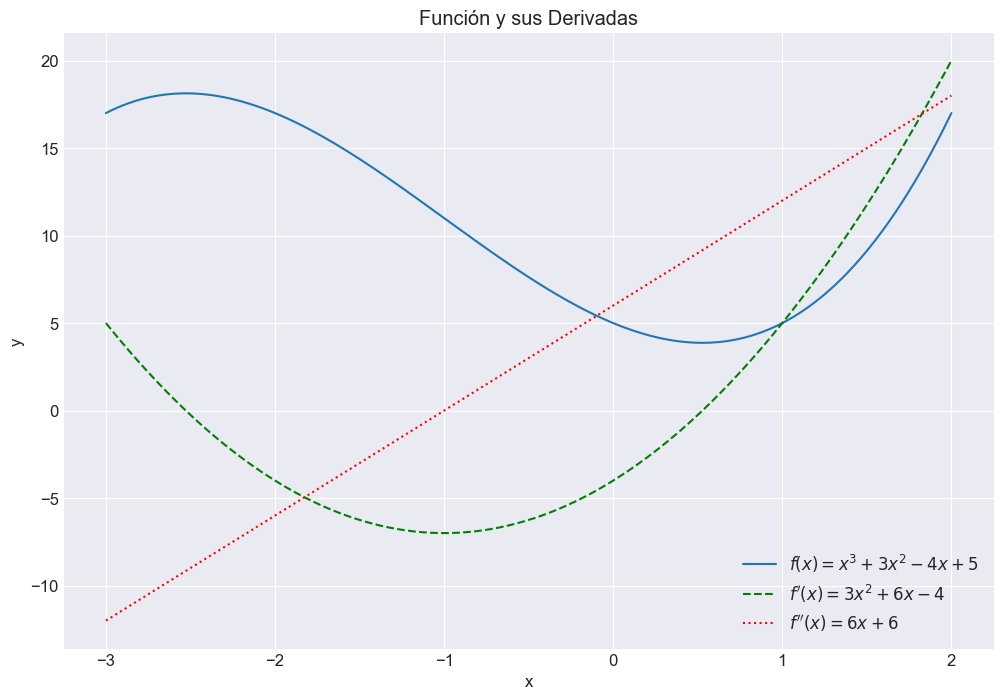

In [8]:
def higher_order_derivatives():
    x = symbols('x')
    # Función del ejemplo del PDF
    f = x**3 + 3*x**2 - 4*x + 5
    
    # Calculamos las primeras 4 derivadas
    f_prime = diff(f, x)
    f_double_prime = diff(f_prime, x)
    f_triple_prime = diff(f_double_prime, x)
    f_quad_prime = diff(f_triple_prime, x)
    
    print("\n=== Derivadas de Orden Superior ===")
    print(f"Función original: f(x) = {f}")
    print(f"\nPrimera derivada: f'(x) = {f_prime}")
    print(f"Segunda derivada: f''(x) = {f_double_prime}")
    print(f"Tercera derivada: f'''(x) = {f_triple_prime}")
    print(f"Cuarta derivada: f''''(x) = {f_quad_prime}")
    
    # Visualización de las derivadas
    x_vals = np.linspace(-3, 2, 500)
    f_lamb = sp.lambdify(x, f, 'numpy')
    f1_lamb = sp.lambdify(x, f_prime, 'numpy')
    f2_lamb = sp.lambdify(x, f_double_prime, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = {sp.latex(f)}$')
    plt.plot(x_vals, f1_lamb(x_vals), 'g--', label=f"$f'(x) = {sp.latex(f_prime)}$")
    plt.plot(x_vals, f2_lamb(x_vals), 'r:', label=f"$f''(x) = {sp.latex(f_double_prime)}$")
    plt.title('Función y sus Derivadas')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

higher_order_derivatives()

## 4. Segundas Derivadas con Diferenciación Implícita

**Proceso**:
1. Encontrar $dy/dx$ mediante diferenciación implícita
2. Diferenciar nuevamente, aplicando la regla del cociente/cadena
3. Sustituir $dy/dx$ en la expresión resultante

### Implementación completa

In [21]:
def implicit_second_derivative():
    x = symbols('x')
    y = Function('y')(x)  # ¡Trata y como función de x!
    
    # Ecuación del primer ejemplo
    equation = 2*y**2 + 6*x**2 - 76 # type: ignore
    
    # Paso 1: Primera derivada implícita
    first_deriv = diff(equation, x)
    dy_dx = solve(first_deriv, diff(y, x))
    
    if not dy_dx:
        print("No se pudo encontrar dy/dx. Revisa la ecuación.")
        return
    
    dy_dx = dy_dx[0]
    print(f"\nPrimera derivada: dy/dx = {dy_dx.simplify()}")

    # Paso 2: Segunda derivada
    d2y_dx2 = diff(dy_dx, x)
    d2y_dx2_sub = d2y_dx2.subs(diff(y, x), dy_dx)
    
    print(f"Segunda derivada: d²y/dx² = {d2y_dx2_sub.simplify()}")

    # Ejemplo adicional
    equation2 = x*y + 24*x - 6*y**2 # type: ignore
    first_deriv2 = diff(equation2, x)
    dy_dx2 = solve(first_deriv2, diff(y, x))
    
    if not dy_dx2:
        print("\nNo se pudo encontrar dy/dx para el segundo ejemplo.")
        return
    
    dy_dx2 = dy_dx2[0]
    d2y_dx2_2 = diff(dy_dx2, x).subs(diff(y, x), dy_dx2)
    
    print("\n=== Ejemplo Adicional ===")
    print(f"Primera derivada: dy/dx = {dy_dx2.simplify()}")
    print(f"Segunda derivada: d²y/dx² = {d2y_dx2_2.simplify()}")

implicit_second_derivative()


Primera derivada: dy/dx = -3*x/y(x)
Segunda derivada: d²y/dx² = -9*x**2/y(x)**3 - 3/y(x)

=== Ejemplo Adicional ===
Primera derivada: dy/dx = (-y(x) - 24)/(x - 12*y(x))
Segunda derivada: d²y/dx² = 2*(y(x) + 24)*(x - 6*y(x) + 144)/(x - 12*y(x))**3


## Resumen Teórico Completo

| **Concepto**                     | **Fórmula/Procedimiento**                                                                 | **Ejemplo**                                                                 |
|----------------------------------|------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| **Diferenciación Implícita**     | $\frac{d}{dx}[f(x,y)] = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx}$ | $x^3 + y^3 = 9xy \Rightarrow 3x^2 + 3y^2y' = 9y + 9xy'$                    |
| **Línea Tangente Implícita**     | $y = y_1 + \left.\frac{dy}{dx}\right|_{(x_1,y_1)}(x - x_1)$                             | En $(2,4)$: $y = \frac{4}{5}x + \frac{12}{5}$                              |
| **Derivadas de Orden Superior**  | $f^{(n)}(x) = \frac{d}{dx}f^{(n-1)}(x)$                                                 | $f(x) = x^3 \Rightarrow f''(x) = 6x$                                       |
| **Segunda Derivada Implícita**   | 1. Encontrar $y'$<br>2. Derivar $y'$ respecto a $x$<br>3. Sustituir $y'$                | $2y^2 + 6x^2 = 76 \Rightarrow y'' = -\frac{9x^2 + 3y^2}{y^3}$              |
